In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shapely as shp
import geopandas as gpd
import math
import random
import scipy.stats as stats

In [17]:
'''Import Try Data'''
tryDat = pd.read_csv('./data/Try/tryDat_subsetted.csv')

#There aren't any observations that link DBH and crown class so lets just fit a distibution to crown size
tryDat_CC = tryDat[tryDat.TraitID == 325]

tryDat_CC.columns

Index(['Unnamed: 0', 'LastName', 'FirstName', 'DatasetID', 'Dataset',
       'SpeciesName', 'AccSpeciesID', 'AccSpeciesName', 'ObservationID',
       'ObsDataID', 'TraitID', 'TraitName', 'DataID', 'DataName', 'OriglName',
       'OrigValueStr', 'OrigUnitStr', 'ValueKindName', 'OrigUncertaintyStr',
       'UncertaintyName', 'Replicates', 'StdValue', 'UnitName',
       'RelUncertaintyPercent', 'OrigObsDataID', 'ErrorRisk', 'Reference',
       'Comment', 'StdValueStr', 'V29'],
      dtype='object')

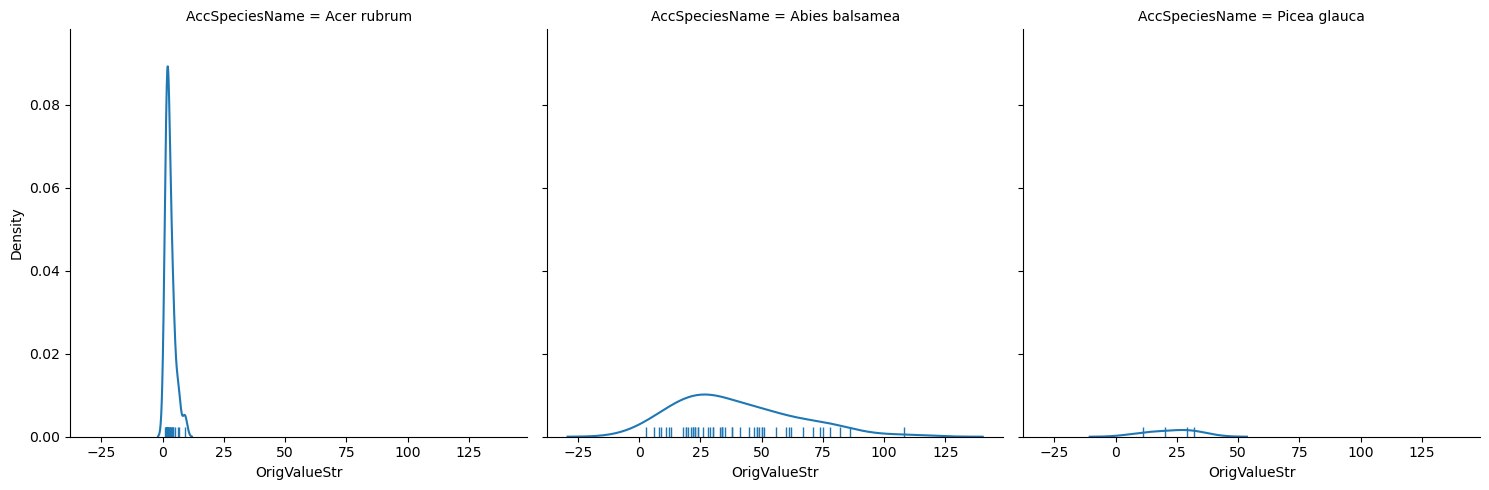

In [21]:
#There aren't any observations that link DBH and crown class so lets just fit a distibution to crown size
tryDat_CC = tryDat[tryDat.TraitID == 325]

sns.displot(data = tryDat_CC, x = 'OrigValueStr', col = 'AccSpeciesName', 
            rug = True, 
            kind = 'kde'
            )

In [27]:
#Fit gamma distriubtion to fit to Abies balsamea data
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(tryDat_CC[tryDat_CC.AccSpeciesID == 32].OrigValueStr)

print('Alpha = ' + str(fit_alpha))
print('Loc = ' + str(fit_loc))
print('Beta = ' + str(fit_beta))

Alpha = 2.84604046158689
Loc = -1.8990921243783796
Beta = 14.411867120014431


In [29]:
tryDat_CC[tryDat_CC.AccSpeciesID == 32].head()

,Unnamed: 0,LastName,FirstName,DatasetID,Dataset,SpeciesName,AccSpeciesID,AccSpeciesName,ObservationID,ObsDataID,...,Replicates,StdValue,UnitName,RelUncertaintyPercent,OrigObsDataID,ErrorRisk,Reference,Comment,StdValueStr,V29
316,317,Aubin,Isabelle,629,Traits of Plants in Canada (TOPIC),Abies balsamea,32,Abies balsamea,6226167,60720280,...,NaN,0.09,m,NaN,NaN,4.07321,"Morrison, I & Wickware G.M. Internal governmen...",NaN,NaN,NaN
317,318,Aubin,Isabelle,629,Traits of Plants in Canada (TOPIC),Abies balsamea,32,Abies balsamea,6226173,60720358,...,NaN,0.18,m,NaN,NaN,3.27020,"Morrison, I & Wickware G.M. Internal governmen...",NaN,NaN,NaN
318,319,Aubin,Isabelle,629,Traits of Plants in Canada (TOPIC),Abies balsamea,32,Abies balsamea,6226179,60720436,...,NaN,0.23,m,NaN,NaN,2.98623,"Morrison, I & Wickware G.M. Internal governmen...",NaN,NaN,NaN
320,321,Aubin,Isabelle,629,Traits of Plants in Canada (TOPIC),Abies balsamea,32,Abies balsamea,6226185,60720514,...,NaN,0.34,m,NaN,NaN,2.53341,"Morrison, I & Wickware G.M. Internal governmen...",NaN,NaN,NaN
321,322,Aubin,Isabelle,629,Traits of Plants in Canada (TOPIC),Abies balsamea,32,Abies balsamea,6226191,60720592,...,NaN,0.22,m,NaN,NaN,3.03772,"Morrison, I & Wickware G.M. Internal governmen...",NaN,NaN,NaN
